In [9]:
import onnxruntime as rt
import uproot
import numpy as np
from matplotlib import pyplot as plt
from collections import OrderedDict


In [10]:

bkg_morphing_dnn_input_variables = OrderedDict(
    {
        "era": ["events", "era"],
        "higgs1_reco_pt": ["HiggsLeading", "pt"],
        "higgs1_reco_eta": ["HiggsLeading", "eta"],
        "higgs1_reco_phi": ["HiggsLeading", "phi"],
        "higgs1_reco_mass": ["HiggsLeading", "mass"],
        "higgs2_reco_pt": ["HiggsSubLeading", "pt"],
        "higgs2_reco_eta": ["HiggsSubLeading", "eta"],
        "higgs2_reco_phi": ["HiggsSubLeading", "phi"],
        "higgs2_reco_mass": ["HiggsSubLeading", "mass"],
        "HT": ["events", "HT"],
        "higgs1_DeltaRjj": ["HiggsLeading", "dR"],
        "higgs2_DeltaRjj": ["HiggsSubLeading", "dR"],
        "minDeltaR_Higgjj": ["events", "dR_min"],
        "maxDeltaR_Higgjj": ["events", "dR_max"],
        "higgs1_helicityCosTheta": ["HiggsLeading", "helicityCosTheta"],
        "higgs2_helicityCosTheta": ["HiggsSubLeading", "helicityCosTheta"],
        "hh_CosThetaStar_CS": ["HH", "Costhetastar_CS"],
        "hh_vec_mass": ["HH", "mass"],
        "hh_vec_pt": ["HH", "pt"],
        "hh_vec_eta": ["HH", "eta"],
        "hh_vec_DeltaR": ["HH", "dR"],
        "hh_vec_DeltaPhi": ["HH", "dPhi"],
        "hh_vec_DeltaEta": ["HH", "dEta"],
        "higgs1_reco_jet1_pt": ["JetGoodFromHiggsOrdered:0", "pt"],
        "higgs1_reco_jet1_eta": ["JetGoodFromHiggsOrdered:0", "eta"],
        "higgs1_reco_jet1_phi": ["JetGoodFromHiggsOrdered:0", "phi"],
        "higgs1_reco_jet1_mass": ["JetGoodFromHiggsOrdered:0", "mass"],
        "higgs1_reco_jet2_pt": ["JetGoodFromHiggsOrdered:1", "pt"],
        "higgs1_reco_jet2_eta": ["JetGoodFromHiggsOrdered:1", "eta"],
        "higgs1_reco_jet2_phi": ["JetGoodFromHiggsOrdered:1", "phi"],
        "higgs1_reco_jet2_mass": ["JetGoodFromHiggsOrdered:1", "mass"],
        "higgs2_reco_jet1_pt": ["JetGoodFromHiggsOrdered:2", "pt"],
        "higgs2_reco_jet1_eta": ["JetGoodFromHiggsOrdered:2", "eta"],
        "higgs2_reco_jet1_phi": ["JetGoodFromHiggsOrdered:2", "phi"],
        "higgs2_reco_jet1_mass": ["JetGoodFromHiggsOrdered:2", "mass"],
        "higgs2_reco_jet2_pt": ["JetGoodFromHiggsOrdered:3", "pt"],
        "higgs2_reco_jet2_eta": ["JetGoodFromHiggsOrdered:3", "eta"],
        "higgs2_reco_jet2_phi": ["JetGoodFromHiggsOrdered:3", "phi"],
        "higgs2_reco_jet2_mass": ["JetGoodFromHiggsOrdered:3", "mass"],
        "add_jet1pt_pt": ["add_jet1pt", "pt"],
        "add_jet1pt_eta": ["add_jet1pt", "eta"],
        "add_jet1pt_phi": ["add_jet1pt", "phi"],
        "add_jet1pt_mass": ["add_jet1pt", "mass"],
        "sigma_over_higgs1_reco_mass": ["events", "sigma_over_higgs1_reco_mass"],
        "sigma_over_higgs2_reco_mass": ["events", "sigma_over_higgs2_reco_mass"],
    }
)
bkg_morphing_dnn_input_variables_list = list(bkg_morphing_dnn_input_variables.keys())



In [11]:
input_root=f'/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/file_root/JetMET_2022EE_2b_signal_region_to_4b_soumya_january2025.root'
tree=uproot.open(input_root)["tree"]
input_data_dict = tree.arrays(bkg_morphing_dnn_input_variables_list, library="np")


In [12]:
n_events = 100000
# get the input data as a numpy array
input_data = np.array([input_data_dict[col][:n_events] for col in bkg_morphing_dnn_input_variables_list], dtype=np.float32).T

In [13]:

# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/best_models/average_model_from_pytorch_noratio.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/average_model_from_pytorch.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/best_models_onnx/average_model_from_onnx.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/best_models_onnx/average_model_from_onnx.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/average_model_from_onnx.onnx'




# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/output/run00_model_15_ratio.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/output/run01_model_12_ratio.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/run01_model_12_state_dict.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/run02_model_12_state_dict.onnx'
model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/run00_model_15_state_dict.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/one_model/output/average_model_from_onnx_run0_run1.onnx'
model_path='/work/tharte/datasets/ML_pytorch/out/batch00/best_models_onnx/best_model_run02.onnx'
# model_path='/work/tharte/datasets/ML_pytorch/out/batch00/run02/state_dict/model_12_state_dict.onnx'
model_path='/work/tharte/datasets/ML_pytorch/out/running_new_model/state_dict/model_21_state_dict.onnx'
model_path='/work/tharte/datasets/ML_pytorch/out/running_new_model/state_dict/model_15_state_dict.onnx'


In [14]:
session_combine = rt.InferenceSession(
    model_path,
    providers=rt.get_available_providers()
)
# print the input/putput name and shape
input_name=[input.name for input in session_combine.get_inputs()]
output_name=[output.name for output in session_combine.get_outputs()]
print("Inputs name:", input_name)
print("Outputs name:", output_name)

input_shape=[input.shape for input in session_combine.get_inputs()]
output_shape=[output.shape for output in session_combine.get_outputs()]
print("Inputs shape:", input_shape)
print("Outputs shape:", output_shape)

input_example = {input_name[0]: input_data}
output = session_combine.run(output_name, input_example)[0]


Inputs name: ['InputVariables']
Outputs name: ['Sigmoid']
Inputs shape: [['batch_size', 45]]
Outputs shape: [['batch_size', 1]]


In [15]:
print(output)
print(output/(1-output))

[[0.78706276]
 [0.5969839 ]
 [0.6355024 ]
 ...
 [0.8149303 ]
 [0.8515208 ]
 [0.76666164]]
[[3.6962194]
 [1.4812905]
 [1.7435023]
 ...
 [4.4033704]
 [5.734949 ]
 [3.2856221]]


/tmp/ipykernel_47896/69949162.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


0.7116764


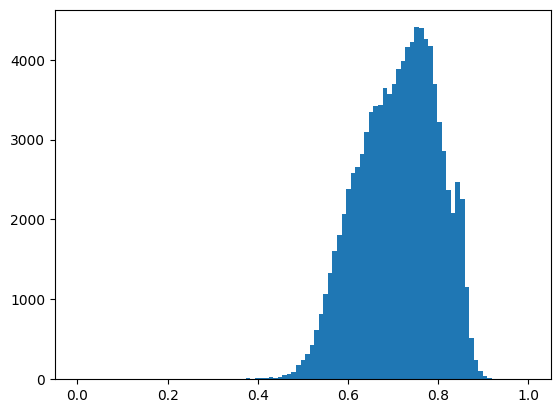

In [20]:
# plot the histogram of weight_dnn
fig, ax = plt.subplots()
plt.hist(
    output,
    # bins=np.logspace(-1, 0, 100),
    bins=np.linspace(0, 1, 100),
)
# ax.set_xscale("log")
# ax.set_yscale("log")
fig.show()

print(np.mean(output))

/tmp/ipykernel_47896/4193805512.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


2.8301594


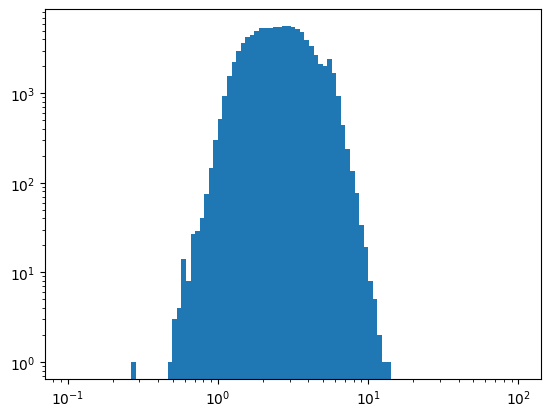

In [24]:
# plot the histogram of weight_dnn
fig, ax = plt.subplots()
plt.hist(
    output/(1-output),
    bins=np.logspace(-1, 2, 100),
    # bins=np.linspace(0, 1, 100),
)
ax.set_xscale("log")
ax.set_yscale("log")
fig.show()

print(np.mean(output/(1-output)))